<pre>
Name: Ritika Sarkar
Reg. No.: 19BAI1031
</pre>

### Foreground Extraction, Background Subtraction

Dataset - [Histopathologic Cancer Detection](https://www.kaggle.com/c/histopathologic-cancer-detection)

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
from google.colab.patches import cv2_imshow

#### Importing Dataset

In [2]:
mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download histopathologic-cancer-detection

  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 10.8MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 25.6MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 35.8MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 27.4MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 26.4MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 26.4MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 24.1MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 28.0MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 25.2MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 27.3MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 20.9MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 27.6MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 27.8MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [0

#### Importing the image

In [6]:
image = cv2.imread('/content/0000da768d06b879e5754c43e2298ce48726f722.tif')
image1 = cv2.imread('/content/001161a2eca200f565f12870048a78fa5b320dee.tif')

In [7]:
image.shape

(96, 96, 3)

In [8]:
reimage = cv2.resize(image, (150,150), interpolation = cv2.INTER_AREA)
reimage1 = cv2.resize(image1, (150,150), interpolation = cv2.INTER_AREA)

In [9]:
# converting to grayscale
grayimg = cv2.cvtColor(reimage, cv2.COLOR_BGR2GRAY)
grayimg1 = cv2.cvtColor(reimage1, cv2.COLOR_BGR2GRAY)

Original image


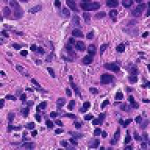

Original image 2


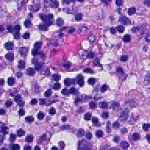

In [10]:
print("Original image")
cv2_imshow(reimage)
print("Original image 2")
cv2_imshow(reimage1)

Gray image


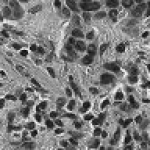

Gray image 2


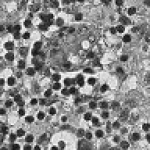

In [11]:
print("Gray image")
cv2_imshow(grayimg)
print("Gray image 2")
cv2_imshow(grayimg1)

#### A. Foreground Extraction

##### Grabcut Algorithm

Image 1

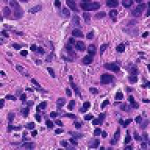

In [ ]:
cv2_imshow(reimage)

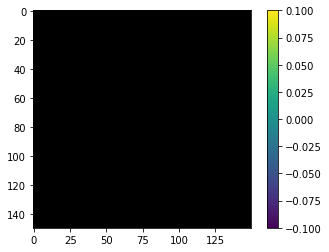

(<matplotlib.image.AxesImage at 0x7f965d9cf490>,
 None)

In [ ]:
# cv2.grabCut()
mask = np.zeros(reimage.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (0,0,149,149)
# image, mask, rectangle, backgroundModel, foregroundModel, iterationCount[, mode]
cv2.grabCut(reimage,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = reimage*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

In [ ]:
imgg = cv2.imread('/content/chh.tif')
imgg.shape

(96, 96, 3)

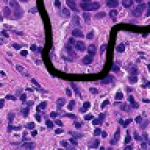

In [ ]:
imgg = cv2.resize(imgg, (150,150), interpolation = cv2.INTER_AREA)
cv2_imshow(imgg)

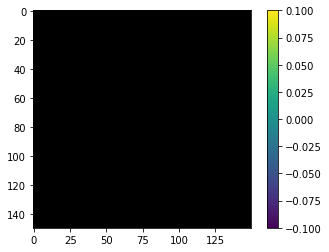

(<matplotlib.image.AxesImage at 0x7f965d6ac590>,
 None)

In [ ]:
# manual mask
mask = np.zeros(imgg.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (10,10,149,149)
# image, mask, rectangle, backgroundModel, foregroundModel, iterationCount[, mode]
cv2.grabCut(imgg,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = imgg*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

Image 2

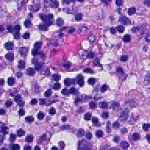

In [ ]:
cv2_imshow(reimage1)

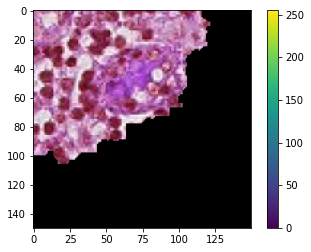

(<matplotlib.image.AxesImage at 0x7f965dbbb790>,
 None)

In [ ]:
# cv2.grabCut()
mask = np.zeros(reimage1.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (0,0,149,149)
# image, mask, rectangle, backgroundModel, foregroundModel, iterationCount[, mode]
cv2.grabCut(reimage1,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = reimage1*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

In [ ]:
img = cv2.imread('/content/ch.tif')
img.shape

(96, 96, 3)

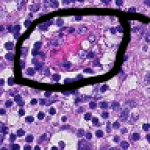

In [ ]:
img = cv2.resize(img, (150,150), interpolation = cv2.INTER_AREA)
cv2_imshow(img)

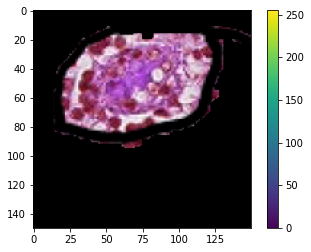

(<matplotlib.image.AxesImage at 0x7f965dd1f350>,
 None)

In [ ]:
# manual mask
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (10,10,149,149)
# image, mask, rectangle, backgroundModel, foregroundModel, iterationCount[, mode]
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

##### Contour Detection

Image 1

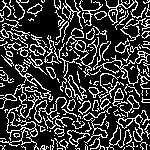

In [ ]:
# find_largest_contour()
denoised = cv2.GaussianBlur(reimage, (3,3), 0)
canny = cv2.Canny(image = denoised, threshold1 = 100, threshold2 = 200)
cv2_imshow(canny)

In [ ]:
# image, contour retrieval mode, contour approximation method
contours, hierarchy = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
len(contours)

149

Original image


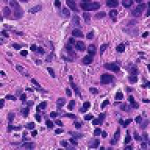

Contours


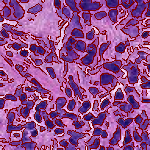

In [ ]:
colorc = reimage.copy()
# image, contours, contour index, color, thickness
cv2.drawContours(colorc, contours, -1, (0,0,128), 1)
print("Original image")
cv2_imshow(reimage)
print("Contours")
cv2_imshow(colorc)

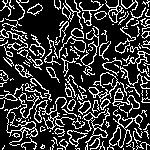

In [ ]:
# find_largest_contour()
denoised = cv2.GaussianBlur(grayimg, (3,3), 0)
canny = cv2.Canny(image = denoised, threshold1 = 100, threshold2 = 200)
cv2_imshow(canny)

In [ ]:
# image, contour retrieval mode, contour approximation method
contours, hierarchy = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
len(contours)

130

Original image


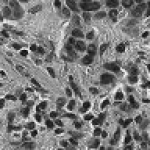

Contours


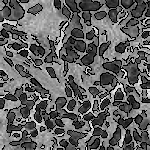

In [ ]:
grayc = grayimg.copy()
# image, contours, contour index, color, thickness
cv2.drawContours(grayc, contours, -1, (0,128,0), 1)
print("Original image")
cv2_imshow(grayimg)
print("Contours")
cv2_imshow(grayc)

Image 2

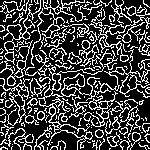

In [12]:
# find_largest_contour()
denoised = cv2.GaussianBlur(reimage1, (3,3), 0)
canny = cv2.Canny(image = denoised, threshold1 = 100, threshold2 = 200)
cv2_imshow(canny)

In [13]:
# image, contour retrieval mode, contour approximation method
contours, hierarchy = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
len(contours)

154

Original image


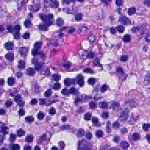

Contours


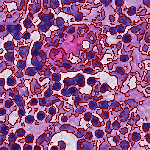

In [14]:
colorc = reimage1.copy()
# image, contours, contour index, color, thickness
cv2.drawContours(colorc, contours, -1, (0,0,128), 1)
print("Original image")
cv2_imshow(reimage1)
print("Contours")
cv2_imshow(colorc)

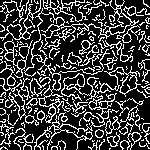

In [15]:
# find_largest_contour()
denoised = cv2.GaussianBlur(grayimg1, (3,3), 0)
canny = cv2.Canny(image = denoised, threshold1 = 100, threshold2 = 200)
cv2_imshow(canny)

In [16]:
# image, contour retrieval mode, contour approximation method
contours, hierarchy = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
len(contours)

137

Original image


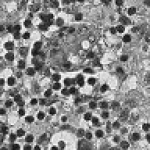

Contours


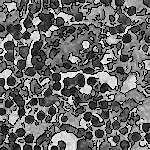

In [17]:
grayc = grayimg1.copy()
# image, contours, contour index, color, thickness
cv2.drawContours(grayc, contours, -1, (0,128,0), 1)
print("Original image")
cv2_imshow(grayimg1)
print("Contours")
cv2_imshow(grayc)

#### Observation A
1. The GrabCut algorithm failed to grab any part of the first image, probably because there were too many small objects which are supposed to be in the foreground. In the second image, it is able to grab the big red region, so using the manual mask we aid it in capturing that region properly.
2. The Contour detection algorithm works well if the Gaussian noise is removed from the images, as well as the image is binarized and edges are identified using an edge detection method. We find that more number of contours are detected for the color images than the greyscale ones, probably because greyscale smoothens out some extraneous objects that may be present with differing colors in color images.

#### B. Background Subtraction

##### BackgroundSubtractorMOG

Image 1

Original image


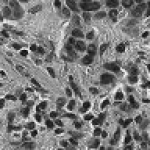

MOG


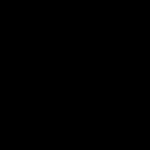

In [ ]:
fgbg = cv2.bgsegm.createBackgroundSubtractorMOG()
ret, thresh = cv2.threshold(grayimg, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) 
print("Original image")
cv2_imshow(grayimg)
print("MOG")
fgmask = fgbg.apply(thresh)
cv2_imshow(fgmask)

Image 2

Original image


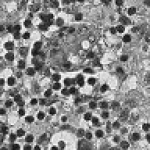

MOG


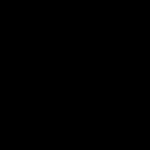

In [ ]:
fgbg = cv2.bgsegm.createBackgroundSubtractorMOG()
ret, thresh = cv2.threshold(grayimg1, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) 
print("Original image")
cv2_imshow(grayimg1)
print("MOG")
fgmask = fgbg.apply(thresh)
cv2_imshow(fgmask)

##### BackgroundSubtractorMOG2

Image 1

Original image


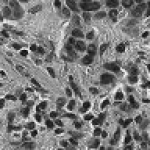

MOG2


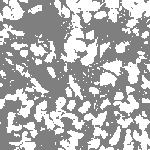

In [ ]:
fgbg2 = cv2.createBackgroundSubtractorMOG2()
ret, thresh = cv2.threshold(grayimg, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) 
print("Original image")
cv2_imshow(grayimg)
print("MOG2")
fgmask2 = fgbg2.apply(thresh)
cv2_imshow(fgmask2)

Image 2

Original image


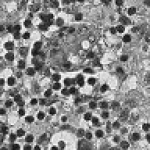

MOG2


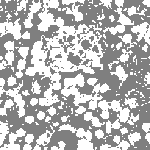

In [ ]:
fgbg2 = cv2.createBackgroundSubtractorMOG2()
ret, thresh = cv2.threshold(grayimg1, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) 
print("Original image")
cv2_imshow(grayimg1)
print("MOG2")
fgmask2 = fgbg2.apply(thresh)
cv2_imshow(fgmask2)

##### BackgroundSubtractorGMG

Image 1

Original image


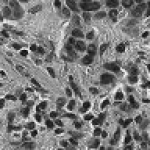

GMG


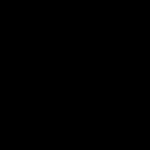

In [ ]:
fgbg3 = cv2.bgsegm.createBackgroundSubtractorGMG()
ret, thresh = cv2.threshold(grayimg, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) 
print("Original image")
cv2_imshow(grayimg)
print("GMG")
fgmask = fgbg3.apply(thresh)
cv2_imshow(fgmask)

Image 2

Original image


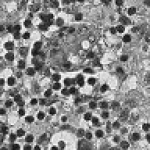

GMG


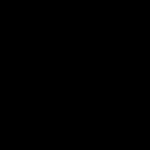

In [ ]:
fgbg3 = cv2.bgsegm.createBackgroundSubtractorGMG()
ret, thresh = cv2.threshold(grayimg1, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) 
print("Original image")
cv2_imshow(grayimg1)
print("GMG")
fgmask = fgbg3.apply(thresh)
cv2_imshow(fgmask)

#### Observation B
1. The Background subtractors work on the binarized output of Otsu thresholding. Otherwise, they aren't able to identify the foreground, and give a black output.
2. MOG and GMG give a black output for the images.
3. MOG2 gives a good output as it is able to subtract the background which is shown as grey and bring out the foreground, indicated in white.

References
1. [Grabcut](https://docs.opencv.org/3.4/d8/d83/tutorial_py_grabcut.html)
2. [Contour detection 1](https://learnopencv.com/contour-detection-using-opencv-python-c/)
3. [Contour detection 2](https://www.geeksforgeeks.org/find-and-draw-contours-using-opencv-python/)
4. [Background Subtraction](https://docs.opencv.org/3.4/d8/d38/tutorial_bgsegm_bg_subtraction.html)